# Exploratory Data Analysis On Olympic Games






<a id="section-zero"></a>
# Introduction 

Olympic games are held every 4 years, it advocates peace among nations via sports.
In this project, we will analyse these games to find relations between parameters like age, sex, country and how successful different countries are in securing medals.


<a id="section-one"></a>
# Importing Libraraies

In [82]:
!pip install opendatasets --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import random
import json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id="section-two"></a>
# Reading the Data

In [83]:
import opendatasets as od
url = 'https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results'
od.download(url)


Skipping, found downloaded files in "./120-years-of-olympic-history-athletes-and-results" (use force=True to force download)


In [84]:
noc_regions = pd.read_csv(
    "/content/120-years-of-olympic-history-athletes-and-results/noc_regions.csv"
)
noc_regions.head(5)
athlete_events = pd.read_csv(
    "/content/120-years-of-olympic-history-athletes-and-results/athlete_events.csv"
)

In [85]:
#noc_regions.head()
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [86]:
noc_regions[noc_regions.region.isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


Filling the null values of region with the respective value in notes column.

In [87]:
noc_regions.loc[noc_regions.region.isna(), "region"] = noc_regions.loc[
    noc_regions.region.isna(), "notes"
]

In [88]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<a id="section-three"></a>
# Preparing Data
*  Filtering for Summer Olympics
*  Merging DataFrames (athlete_events and noc_regions) 

In [89]:
# Filtering only for Summer Olympics
athlete_events = athlete_events[athlete_events.Season == "Summer"]
# Merging athletes and noc_regions data
df = pd.merge(athlete_events, noc_regions, on="NOC", how="left")
df.rename(columns={"region": "Region"}, inplace=True)

In [90]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
 15  Region  222203 non-null  object 
 16  notes   4401 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.6+ MB


Columns with null values Age, Height, Weight, Medal and Region

**Lets proceed with the cleaning stage!**

<a id="section-four"></a>
# Cleaning the Data
* Removing duplicate rows.
* Finding the percentage of null values for each column.
* Analysing the empty data with a matrix.
* Replacing null values for Medal, Age, Weight, Height and Region columns

In [92]:
df.loc[df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
1066,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN
3772,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
3773,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4307,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
4309,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221722,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK,NaN
221723,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK,NaN
221725,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
221727,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN


In [93]:
# keep=False even drops the original row that is why used first.
(df.drop_duplicates(keep="first", inplace=True))

In [94]:
# Calculating the Missing Values % contribution in DF

df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head(10)

notes     98.01
Medal     84.59
Weight    23.74
Height    22.83
Age        4.08
Region     0.16
Season     0.00
Event      0.00
Sport      0.00
City       0.00
dtype: float64

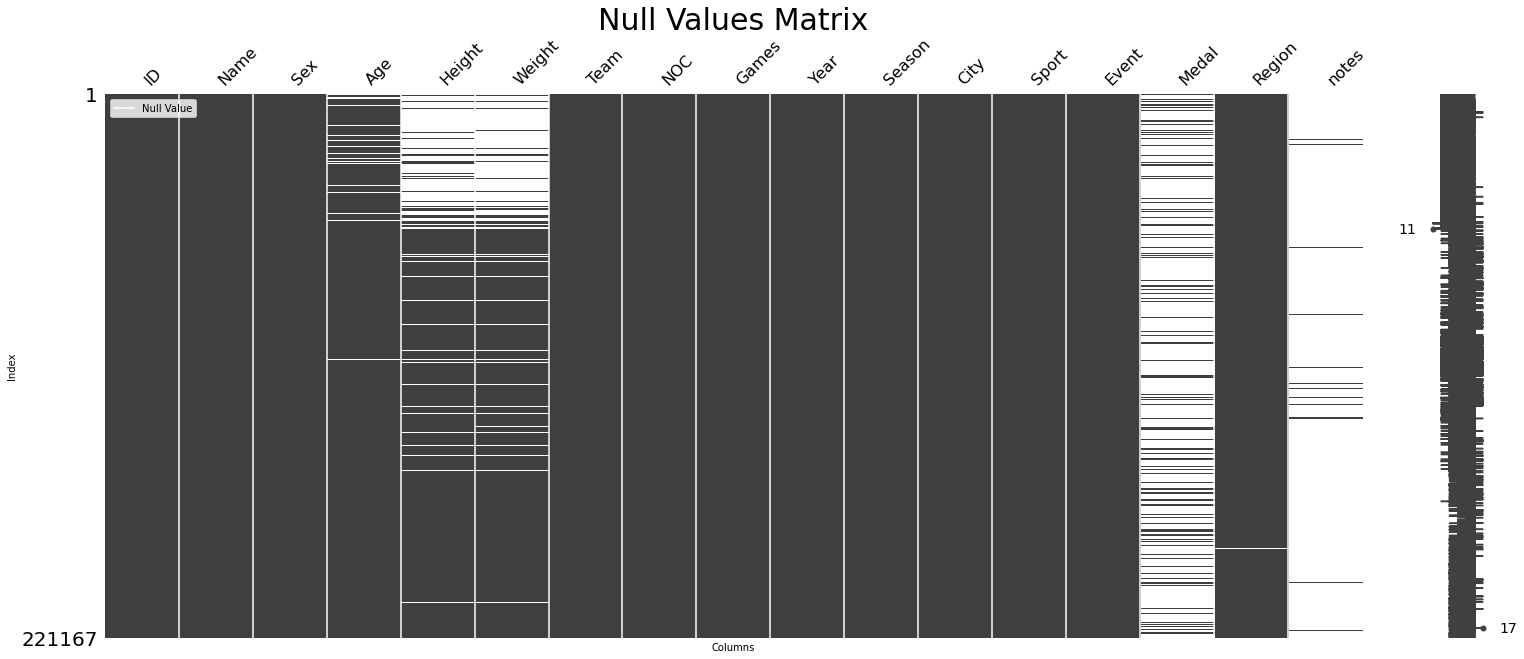

In [95]:
# Analysing null values on a matrix sorted by year.
msno.matrix(df.sort_values('Year'))
plt.title('Null Values Matrix',fontsize=30)
plt.ylabel("Index")
plt.xlabel("Columns")
plt.legend(['Null Value'],loc="upper left")
plt.show()

**Clearly, we see that the major portion of data for height and weight is missing for initial years of Olympics.**

In [96]:
df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

Here null values in Medal column means that the athlete didn't win a medal. Replacing with NoMedal.

In [97]:
df["Medal"].fillna("NoMedal", inplace=True)

In [98]:
df.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoMedal,Netherlands,NaN
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NoMedal,Netherlands,NaN
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NoMedal,Finland,NaN
7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NoMedal,Finland,NaN
8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NoMedal,Finland,NaN
9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NoMedal,Finland,NaN


Filling the null values for Age, Height, Weight on the basis of average of each of those per Event. As generally athlethes on the same event have these similar to each other.

In [99]:
df.Age = df.Age.fillna(df.groupby("Event")["Age"].transform("mean"))
df.Height = df.Height.fillna(df.groupby("Event")["Height"].transform("mean"))
df.Weight = df.Weight.fillna(df.groupby("Event")["Weight"].transform("mean"))
df.Age = np.floor(df.Age)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     221025 non-null  float64
 4   Height  219363 non-null  float64
 5   Weight  216785 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   221167 non-null  object 
 15  Region  220818 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


Still we have few null values, filling with the mean by sex.

In [101]:
df.Age = df.Age.fillna(df.groupby("Sex")["Age"].transform("mean"))
df.Height = df.Height.fillna(df.groupby("Sex")["Height"].transform("mean"))
df.Weight = df.Weight.fillna(df.groupby("Sex")["Weight"].transform("mean"))
df.Age = np.floor(df.Age)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     221167 non-null  float64
 4   Height  221167 non-null  float64
 5   Weight  221167 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   221167 non-null  object 
 15  Region  220818 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


We still have null values for Region. Lets dig a little deeper.

In [103]:
df[df.Region.isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
509,332,Zarinah Abdullah,F,21.0,168.188406,60.9,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NoMedal,NaN,NaN
510,332,Zarinah Abdullah,F,25.0,168.188406,60.9,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NoMedal,NaN,NaN
2362,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.000000,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NoMedal,NaN,NaN
6652,4264,Ang Peng Siong,M,21.0,180.000000,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NoMedal,NaN,NaN
6653,4264,Ang Peng Siong,M,21.0,180.000000,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NoMedal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220770,134454,Zhang Guirong,F,26.0,182.000000,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NoMedal,NaN,NaN
220771,134454,Zhang Guirong,F,30.0,182.000000,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NoMedal,NaN,NaN
220972,134587,Zhang Xueling,F,21.0,163.000000,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NoMedal,NaN,NaN
220973,134587,Zhang Xueling,F,21.0,163.000000,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NoMedal,NaN,NaN


In [104]:
df[df.Region.isna()].NOC.nunique()

1

Lets fill the null values of region with Singapore, referring the NOC, 'SGP'

In [105]:
df.Region.fillna("Singapore", inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     221167 non-null  float64
 4   Height  221167 non-null  float64
 5   Weight  221167 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   221167 non-null  object 
 15  Region  221167 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


*Now, Its time to explore and find out some patterns. :)*

<a id="section-five"></a>
# Exploratory Data Analysis


In [107]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,China,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,57.485390,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoMedal,Netherlands,NaN


<a id="subsection-zero"></a>
## Summer Olympics Medal Tally

In [108]:
# Creating separate columns for medals
Medals_df = pd.get_dummies(df.Medal).drop("NoMedal", axis=1)
Medals_df.head()

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [109]:
# Concatenating horizonatlly both the dataframes
df = pd.concat([df, Medals_df], axis=1)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,57.485390,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoMedal,Netherlands,NaN,0,0,0


In [110]:
# To have a single row for team events
Medals_tally = df.drop_duplicates(subset=["NOC", "Games", "Event", "Medal"])

In [111]:
# Finding the sum of each medals for each NOC
Medals_tally = (
    Medals_tally.groupby(["NOC"])[["Gold", "Silver", "Bronze"]]
    .sum()
    .sort_values(["Gold", "Silver", "Bronze"], ascending=False)
    .reset_index()
)

In [112]:
# creating new column Total which is the total of medals won
Medals_tally['Total'] = Medals_tally.Gold + Medals_tally.Silver + Medals_tally.Bronze

In [113]:
Medals_tally.head()

,NOC,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,707.0,2544.0
1,URS,394.0,317.0,294.0,1005.0
2,GBR,278.0,316.0,298.0,892.0
3,GER,233.0,261.0,282.0,776.0
4,FRA,233.0,255.0,282.0,770.0


# Participants analysis in Summer games

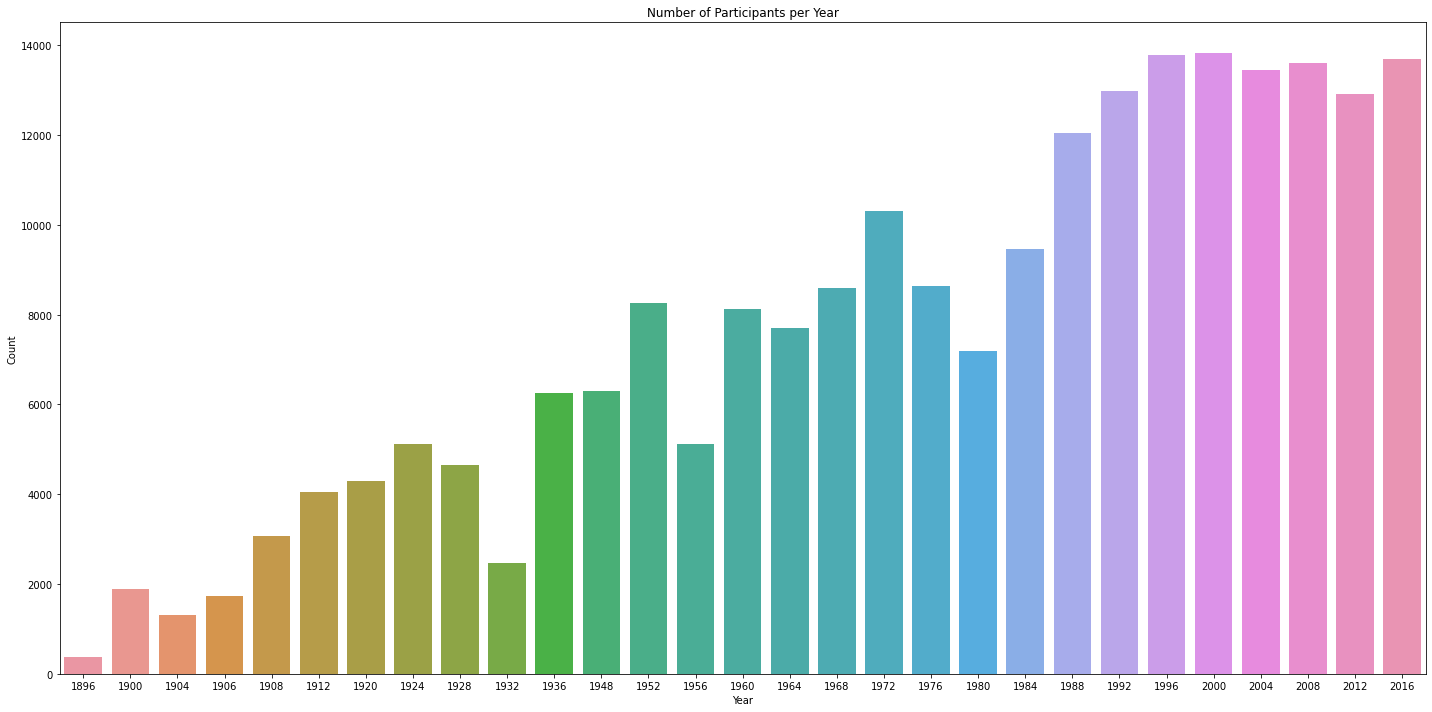

In [114]:
#summer data
df_summer =df[df['Season'] == 'Summer']
Year_count = df_summer.groupby(["Year"])['ID'].count().reset_index(name = 'Count')

# number of participants year wise
plt.figure(figsize = (20,10))
sns.barplot(x = 'Year', y= 'Count', data= Year_count)
plt.title('Number of Participants per Year')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Variation of Male Athletes over time')

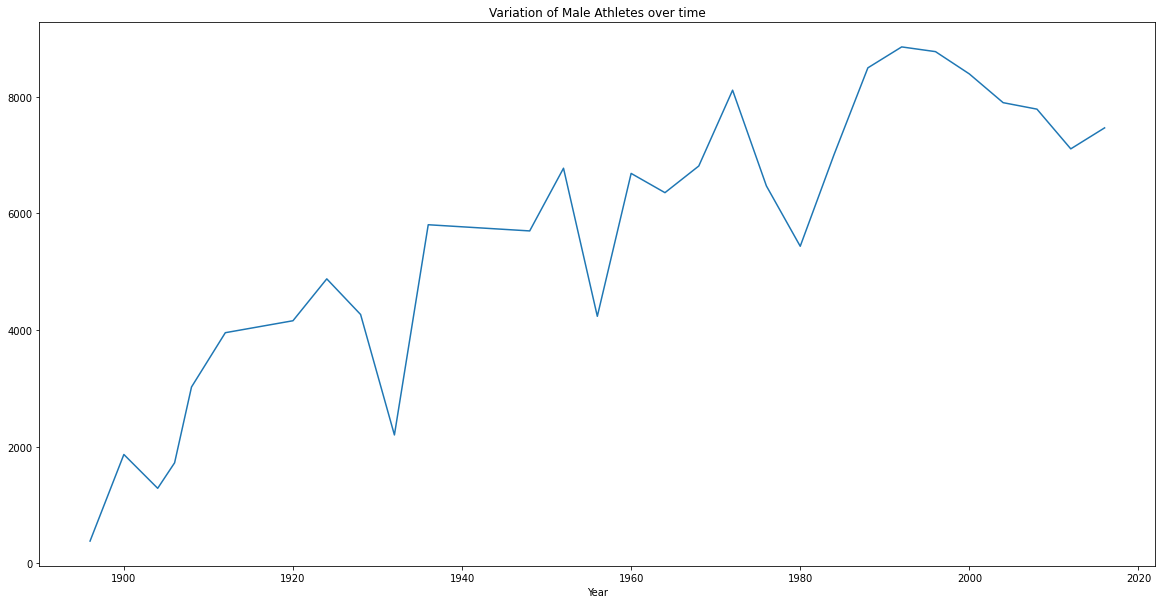

In [115]:
# Participation analysis based on gender
# for this we are creating two datasets of male and female.

# Male participants YoY
Men = df[(df.Sex == 'M') & (df.Season == 'Summer')]
malepart = Men.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
malepart.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')


Text(0.5, 1.0, 'Variation of female Athletes over time')

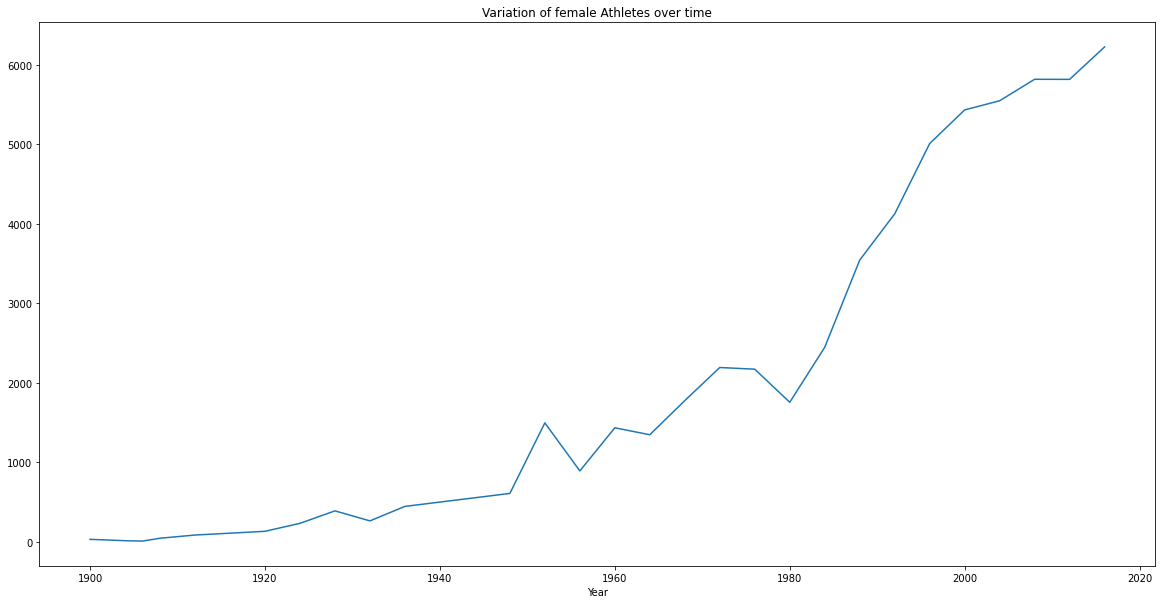

In [116]:
# Female partipicants YoY
Women = df[(df.Sex == 'F') & (df.Season == 'Summer')]
femalepart = Women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
femalepart.loc[:,'F'].plot()
plt.title('Variation of female Athletes over time')

Clearly, USA is way ahead compared to others.


([<matplotlib.patches.Wedge at 0x7f03640fbc10>,
 [Text(0.7323070726664652, -0.8208083523714124, 'M'),
  Text(-0.732306995816837, 0.8208084209349459, 'F')],
 [Text(0.39944022145443553, -0.44771364674804304, '73.2%'),
  Text(-0.39944017953645655, 0.44771368414633406, '26.8%')])

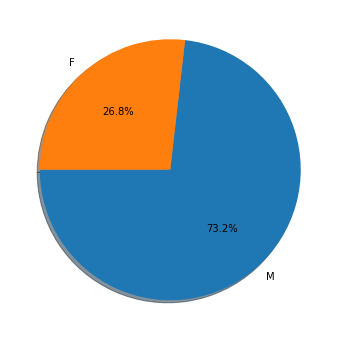

In [117]:
#pie chart for gender wise participation
gender_counts = df.Sex.value_counts()
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels=gender_counts.index, 
        autopct='%1.1f%%', startangle=180, shadow=True)

<a id="subsection-eight"></a>
# Weight, Height relation to Gold Medal for Tennis



In [118]:
# Male Tennis Players 
male_df = df[
    (df.Sex == "M")
    & (df.Sport == "Tennis")
    & ((df.Medal == "Gold") | (df.Medal == "NoMedal"))
]
# Female Tennis Players
female_df = df[
    (df.Sex == "F")
    & (df.Sport == "Tennis")
    & ((df.Medal == "Gold") | (df.Medal == "NoMedal"))
]


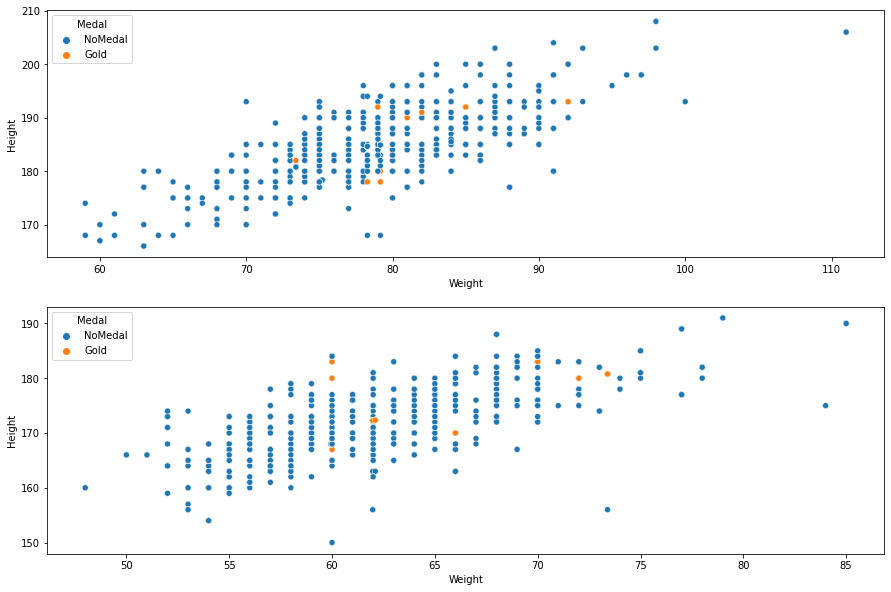

In [119]:
# Plotting for both male and female tennis players 
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.scatterplot(y=male_df.Height, x=male_df.Weight, hue=male_df.Medal)

plt.subplot(2, 1, 2)
sns.scatterplot(y=female_df.Height, x=female_df.Weight, hue=female_df.Medal)


<a id="subsection-nine"></a>
## Age Distribution For Winning Medal

In [120]:
athlete_df = df.drop_duplicates(subset=["Name", "Age"])
a1 = athlete_df["Age"]
a2 = athlete_df[athlete_df.Medal == "Gold"]["Age"]
a3 = athlete_df[athlete_df.Medal == "Silver"]["Age"]
a4 = athlete_df[athlete_df.Medal == "Bronze"]["Age"]
fig = ff.create_distplot(
    [a1, a2, a3, a4],
    ["Overall Analysis", "Gold Medalist", "Silver", "Bronze"],
    show_hist=False,
    show_rug=False,
)
fig.show()


Age Distribution
- The probability of winning a Gold Medal is more
 compared to silver in between the age of
20-25.


<a id="subsection-ten"></a>
# India At Olympics


In [121]:
# filtering for india
india = df[df.Region == "India"]

In [122]:
india.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes,Bronze,Gold,Silver
436,281,S. Abdul Hamid,M,24.0,185.112656,77.337324,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NoMedal,India,NaN,0,0,0
437,281,S. Abdul Hamid,M,24.0,182.349788,73.704416,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NoMedal,India,NaN,0,0,0
790,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.000000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NoMedal,India,NaN,0,0,0
791,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.000000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NoMedal,India,NaN,0,0,0
792,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.000000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NoMedal,India,NaN,0,0,0


### On what sports India won the most medals

In [123]:
sports_india = india.drop_duplicates(["Sport", "Games", "Event"])

sports_india.groupby("Sport")[["Gold", "Silver", "Bronze"]].sum().sort_values(
    ["Gold", "Silver", "Bronze"], ascending=False
).head(8)


,Gold,Silver,Bronze
Sport,,,
Hockey,8,1,2
Shooting,1,2,0
Athletics,0,2,0
Wrestling,0,1,4
Boxing,0,0,2
Badminton,0,0,1
Tennis,0,0,1
Weightlifting,0,0,1


### Top Athletes of India

In [124]:
# To have unique set of Names
athlete_names = india.drop_duplicates(subset=["Name", "Sport", "Region"])[
    ["Name", "Sport", "Region"]
]
# India's Top Athlete
successful = (
    india.groupby("Name")[["Gold", "Silver", "Bronze"]]
    .sum()
    .sort_values("Gold", ascending=False)
    .reset_index()
)

# Merging the above dataframes
athlete_india = (
    pd.merge(athlete_names, successful, on="Name", how="left")
    .sort_values("Gold", ascending=False)
    .reset_index()
    .drop("index", axis=1)
)


In [125]:
athlete_india.head(20)

,Name,Sport,Region,Gold,Silver,Bronze
0,Dhyan Chand Bais,Hockey,India,3,0,0
1,Udham Singh Kular,Hockey,India,3,1,0
2,Randhir Singh Gentle,Hockey,India,3,0,0
3,Leslie Walter Claudius,Hockey,India,3,1,0
4,"Balbir Singh Dosanjh, Sr.",Hockey,India,3,0,0
5,Richard James Allen,Hockey,India,3,0,0
6,Ranganathan Francis,Hockey,India,3,0,0
7,Shankar Pillay Laxman,Hockey,India,2,1,0
8,Carlyle Carrol Tapsell,Hockey,India,2,0,0
9,Leslie Charles Hammond,Hockey,India,2,0,0


# Conclusion

Our analysis on Olympic games data provided insights about country wise success rate; participation of males and females in the events and its pattern over years; relation between height, weight and medals,etc.

Further, we also dig deeper into India specific ranking for different sports and athletes.

We have established basic relations between different features and in future we can also include particular sports, athlete, country,etc. to get focused insights on their perfomance in these games.


